

# Assignment 6: <h1><center> SỬA MÉO TRÊN ẢNH </center></h1>

Thư mục chessboard và thư mục scenes chứa các ảnh thu nhận được từ cùng 1 camera. Hãy:
- sử dụng các ảnh được cung cấp trong thư mục chessboard để tìm tham số cần thiết và
- chỉnh méo của các ảnh trong thư mục scenes thu được bởi camera này.

## Hiệu chỉnh camera

In [1]:
# Các thư viện cần thiết
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import math

## Chuẩn bị các thông số cần thiết
## YOUR CODE HERE

# chessboard dimension (12 x 8) however we need objpoints and imgpoints to have same number of entries and of same size
# Kích thước của bàn cờ (12x8) tuy nhiên chúng ta cần objpoints và impoints có cùng chỉ mục và kích thước
cbrow = 11
cbcolumn = 7

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# Chuẩn bị object points giống như: (0,0,0), (1,0,0), ...., (10,6,0)
objp = np.zeros((cbrow*cbcolumn, 3), np.float32)
objp[:, :2] = np.mgrid[0:cbrow, 0:cbcolumn].T.reshape(-1, 2)


# Mảng đề lưu object points và image points từ toàn bộ các ảnh đảm bảo 2 mảng này có cùng kích thước
objpoints = []  # lưu trữ tọa độ 3d trong không gian thế giới thực (3d point in real world space)
imgpoints = []   # Lưu tọa độ 2D trên ảnh (2d point in image plane)

# Lấy toàn bộ ảnh trong folder
images = glob.glob("chessboard/*.png")
i = 0
for fname in images:
    i = i + 1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tìm góc của bàn cờ (find the chessboard corners)
    ret, corners = cv2.findChessboardCorners(gray, (11, 7), flags=cv2.CALIB_CB_FILTER_QUADS + cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK)

    # Nếu tìm thấy, thêm vào các điểm của đối tượng, điểm của ảnh (sau khi tinh chỉnh) (if found, add object points, image points (after refining them))
    if ret == True:
        corners2 = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        objpoints.append(objp)
        
        # Vẽ và hiển thị các góc (Draw and display the corners)
        img = cv2.drawChessboardCorners(img, (cbrow, cbcolumn), corners2, ret)
        
        #cv2.imshow('Image', img)
        #cv2.waitKey(0)
    else:
        os.remove(fname)

### YOUR CODE HERE

## tìm tham số camera
### YOUR CODE HERE

##### Hiệu chỉnh (CALIBRATION) ######
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None, flags=cv2.CALIB_RATIONAL_MODEL)
dist = np.array(dist)

### YOUR CODE HERE

In [23]:
# distorsion matrix
dist

In [24]:
# camera matrix
mtx

array([[573.09448737,   0.        , 679.10836389],
       [  0.        , 574.472032  , 562.37558912],
       [  0.        ,   0.        ,   1.        ]])

## Sửa méo ảnh thu được từ camera với tham số đã tìm được


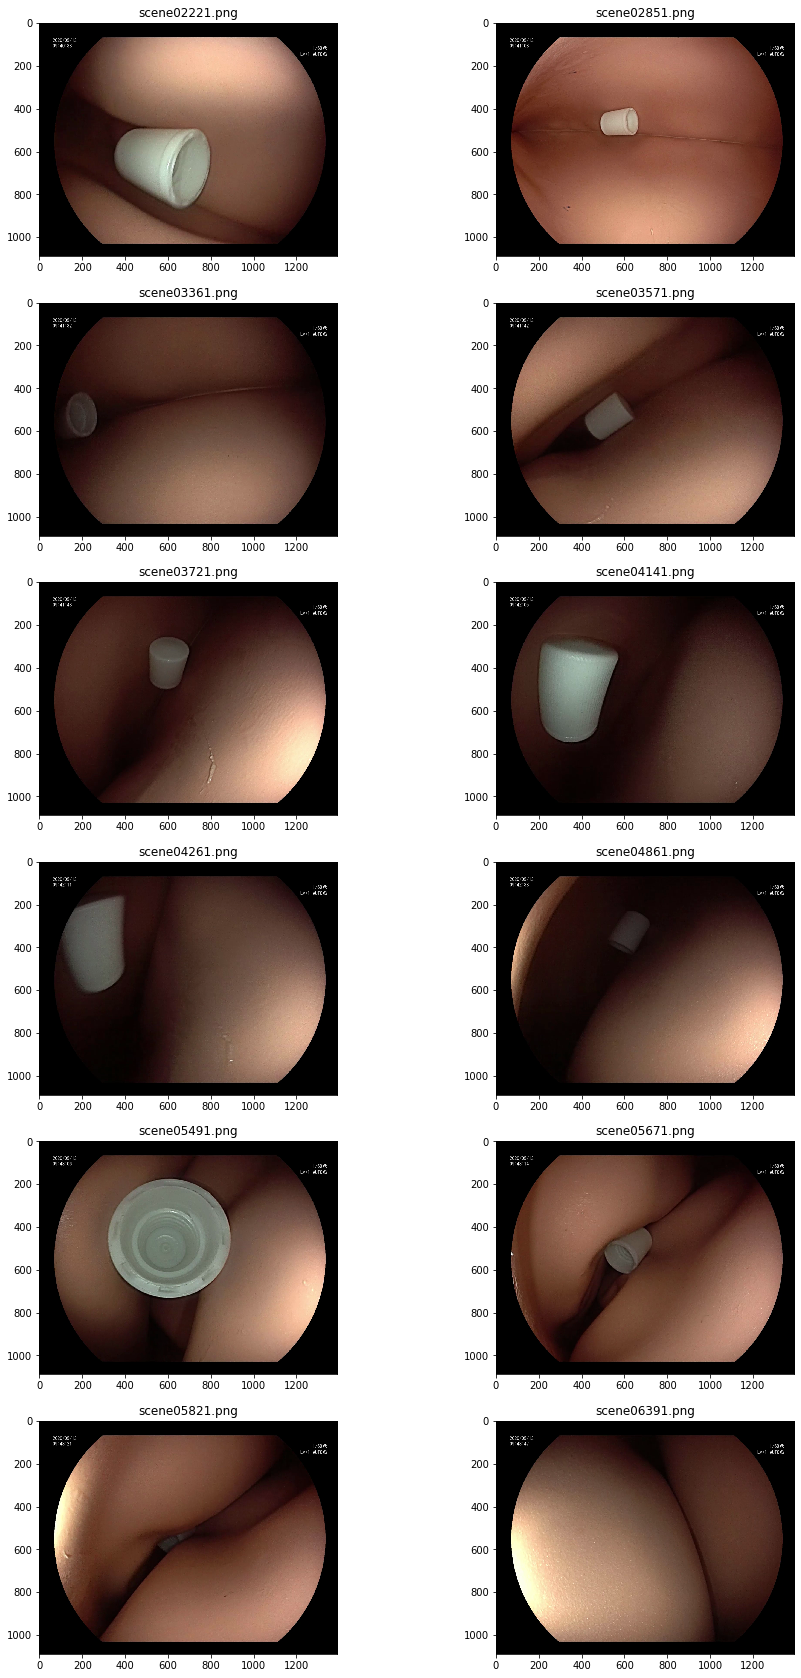

In [25]:
images=glob.glob('scenes/*.png')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

plt.show()

## Thực hiện hiệu chỉnh

In [26]:
##### Hiệu chỉnh và ghi kết quả ra thư mực riêng #####
### YOUR CODE HERE
img1 = cv2.imread('scenes/scene02851.png')
h, w = img1.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(
    mtx, dist, (w, h), 1, (w, h))

resultImg = glob.glob('scenes/*.png')
for rimg in resultImg:
    img = cv2.imread(rimg)
    
    # undistort
    mapx, mapy = cv2.initUndistortRectifyMap(
        mtx, dist, None, newcameramtx, (w, h), 5)
    dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

    # Ghi ản kết quả
    ############Your code here###############
    path = "scenes/result/Calibresult_" + \
        os.path.basename(rimg)
    cv2.imwrite(path, dst)
    ###########################################

### YOUR CODE HERE

# Lỗi phép chiếu (re-projection error)
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(
        objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print("total error", mean_error/len(objpoints))

#cv2.waitKey(0)
#cv2.destroyAllWindows()

total error 0.21191726084221282


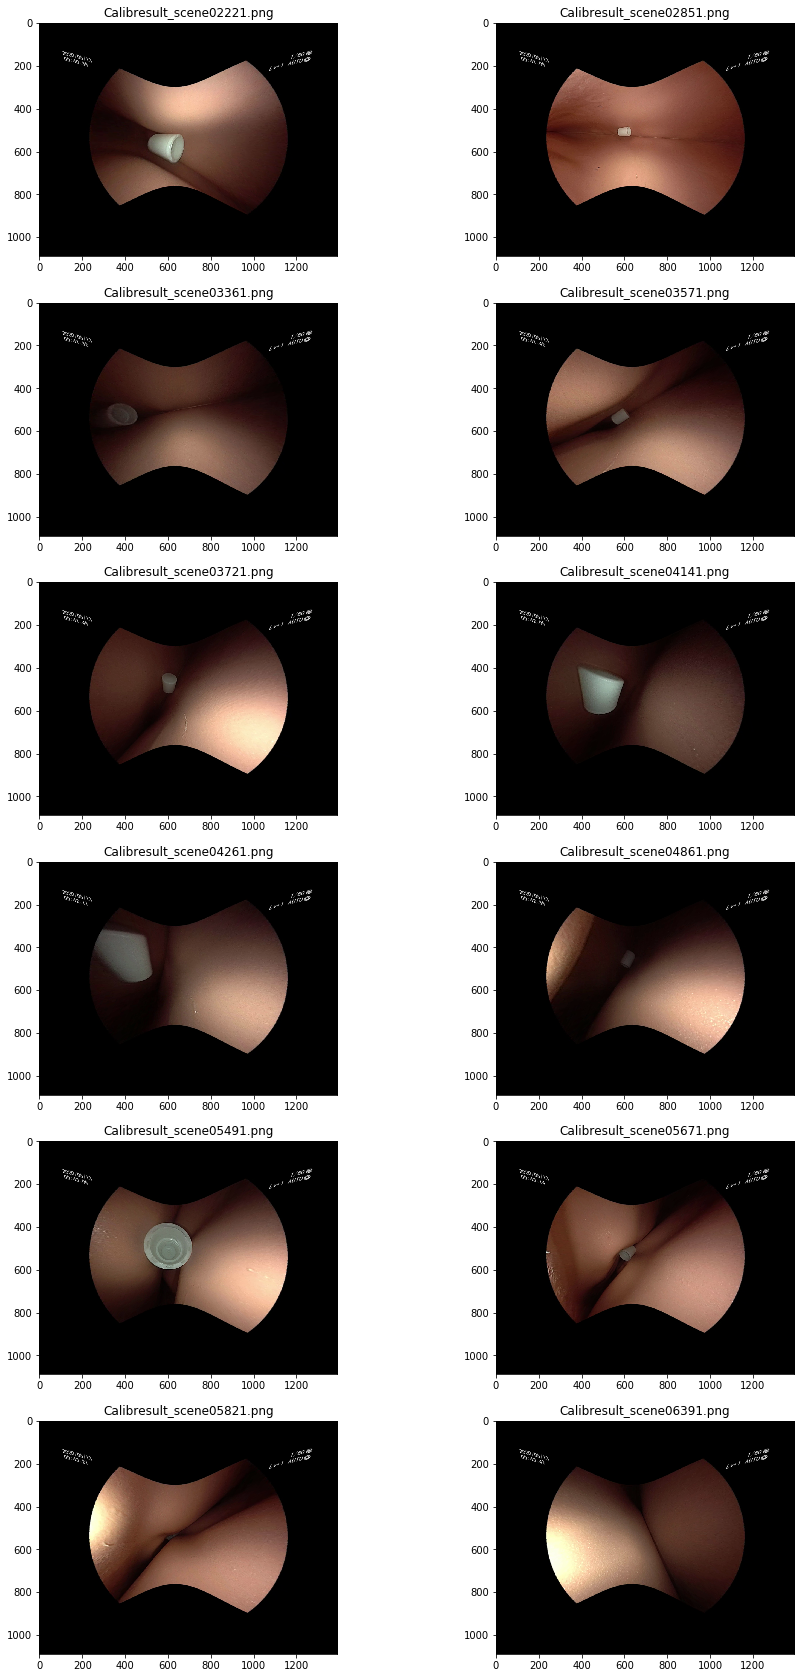

In [27]:
## Hiển thị kết quả sửa méo

### YOUR CODE HERE

images=glob.glob('scenes/result/*.png')
column=2
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,30))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
    
plt.show()

### YOUR CODE HERE